In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm    

In [21]:
data = "data/train.csv"
df = pd.read_csv(data)
# 만약 파일의 형태일 경우 df = pd.read_csv("data/test.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
df.shape

(1460, 81)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
df.shape

(1460, 81)

In [25]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
<br>

[번역기 해병]
<br>

SalePrice - 부동산의 매매 가격(달러). 이것이 바로 예측하려는 목표 변수입니다. 

In [26]:
target = "SalePrice"

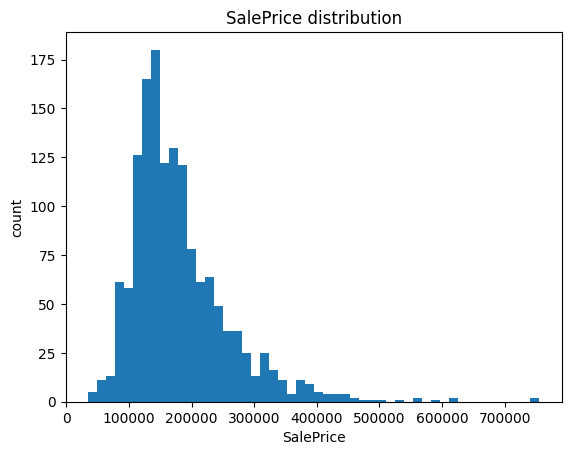

In [27]:
plt.figure()
plt.hist(df[target].dropna(), bins=50)
plt.title("SalePrice distribution")
plt.xlabel("SalePrice")
plt.ylabel("count")
plt.show()

값들이 왼쪽으로 밀려있음.

- 소수의 높은 값들로 인해 오른쪽으로 길게 늘어짐

- 정상화가 필요로 하다. (정규분포를 따르게 만든다.)

In [28]:
# 로그 변환(0에 안전한 log1p)
df["SalePrice_log"] = np.log1p(df[target])
# 로그를 취해서 큰값을 작게 만듦. 정규분표와 유사한 구조로 만듦.
# 비율자체는 동일함

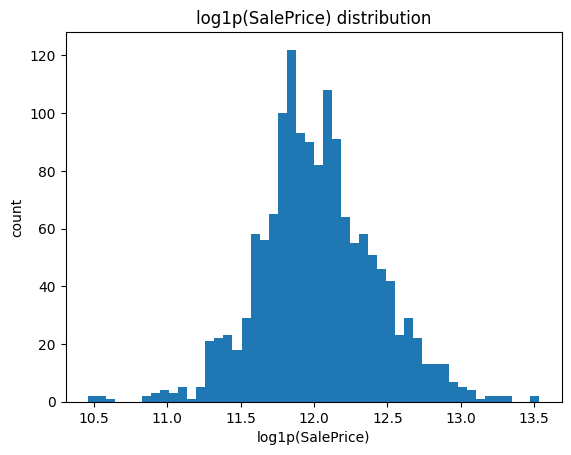

In [29]:
plt.figure()
plt.hist(df["SalePrice_log"].dropna(), bins=50)
plt.title("log1p(SalePrice) distribution")
plt.xlabel("log1p(SalePrice)")
plt.ylabel("count")
plt.show()

In [30]:
df[target].median(), df[target].mean()

# 타겟의 중앙값과 평균값의 차이가 너무 큼.
# 이런경우 중앙값이 중요

(np.float64(163000.0), np.float64(180921.19589041095))

In [32]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_log
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,12.024057
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.399449
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,10.460271
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,11.775105
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,12.001512
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,12.273736
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,13.534474


## 강제로 결측치 추가하는 코드임

In [33]:
import numpy as np
import pandas as pd
# 0) 원본 보존
df_miss = df.copy()
# 1) (실습용) 날짜 컬럼 만들기: YrSold + MoSold → SaleDate
#    (일(day)은 임의로 1일로 둡니다)
df_miss["SaleDate"] = pd.to_datetime(
    dict(year=df_miss["YrSold"], month=df_miss["MoSold"], day=1),
    errors="coerce"
)
# 2) 결측치 주입 함수 (지정한 컬럼에 n개씩 결측치 넣기)
def inject_missing(df, cols, n_each=15, seed=42):
    rng = np.random.default_rng(seed)
    df2 = df.copy()
    for c in cols:
        if c not in df2.columns:
            continue
        # 이미 결측인 행은 제외하고, "결측이 아닌 행" 중에서만 뽑기
        candidates = df2.index[df2[c].notna()].to_numpy()
        if len(candidates) == 0:
            continue
        n = min(n_each, len(candidates))
        idx = rng.choice(candidates, size=n, replace=False)
        # 날짜/시간이면 NaT, 그 외는 NaN
        if pd.api.types.is_datetime64_any_dtype(df2[c]):
            df2.loc[idx, c] = pd.NaT
        else:
            df2.loc[idx, c] = np.nan
    return df2
# 3) 실습용 "주요 숫자 컬럼" + "날짜 컬럼" 선택
num_cols_to_break = ["GrLivArea", "TotalBsmtSF", "GarageArea", "YearBuilt", "OverallQual"]
date_cols_to_break = ["SaleDate"]  # 방금 만든 날짜 컬럼
# 4) 결측치 주입 (컬럼당 20개씩)
df_miss = inject_missing(df_miss, num_cols_to_break + date_cols_to_break, n_each=20, seed=7)
# 5) 확인: 결측치 개수 출력
check_cols = num_cols_to_break + date_cols_to_break
print(df_miss[check_cols].isna().sum().sort_values(ascending=False))

GrLivArea      20
TotalBsmtSF    20
GarageArea     20
YearBuilt      20
OverallQual    20
SaleDate       20
dtype: int64


In [35]:
df = df_miss
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             1460 non-null   int64         
 1   MSSubClass     1460 non-null   int64         
 2   MSZoning       1460 non-null   object        
 3   LotFrontage    1201 non-null   float64       
 4   LotArea        1460 non-null   int64         
 5   Street         1460 non-null   object        
 6   Alley          91 non-null     object        
 7   LotShape       1460 non-null   object        
 8   LandContour    1460 non-null   object        
 9   Utilities      1460 non-null   object        
 10  LotConfig      1460 non-null   object        
 11  LandSlope      1460 non-null   object        
 12  Neighborhood   1460 non-null   object        
 13  Condition1     1460 non-null   object        
 14  Condition2     1460 non-null   object        
 15  BldgType       1460 n

In [36]:
target = "SalePrice"
feature = "GrLivArea"  # 대표 면적 변수(관계 점검용으로 많이 씀) = 평수
df[[target, feature]].head()

,SalePrice,GrLivArea
0,208500,1710.0
1,181500,1262.0
2,223500,1786.0
3,140000,1717.0
4,250000,2198.0


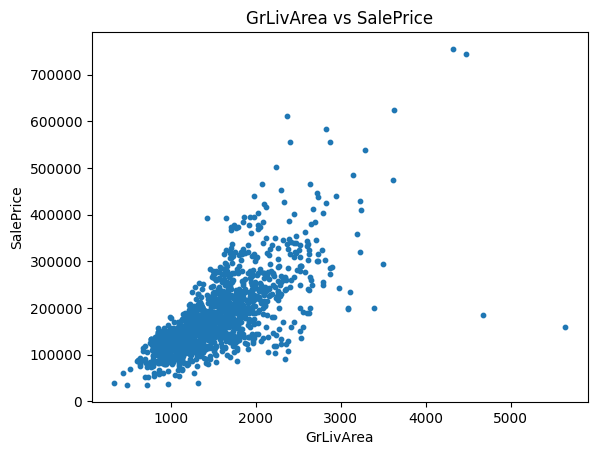

In [37]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df[feature], df[target], s=10)
plt.xlabel(feature); plt.ylabel(target)
plt.title(f"{feature} vs {target}")
plt.show()

In [ ]:
# 양의 상관관계인가?
# 전체적으로 우상향의 경향을 보이고 있다.

# 추의에서 어긋나지 않는 값들은 이상치가 아니다.
# 

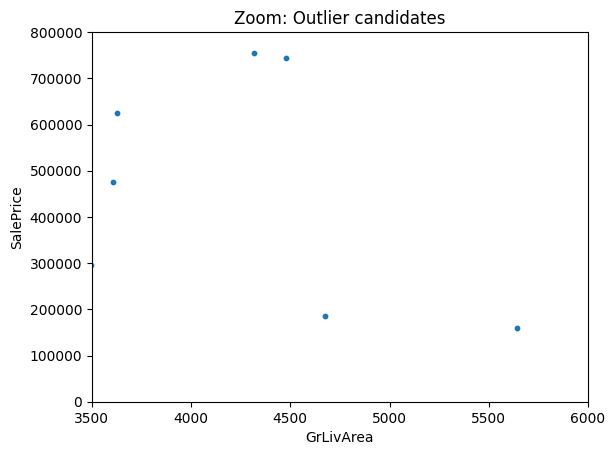

In [38]:
plt.figure()
plt.scatter(df[feature], df[target], s=10)
plt.xlim(3500, 6000)           # 오른쪽 구간 확대
plt.ylim(0, 800000)
plt.xlabel(feature); plt.ylabel(target)
plt.title("Zoom: Outlier candidates")
plt.show()

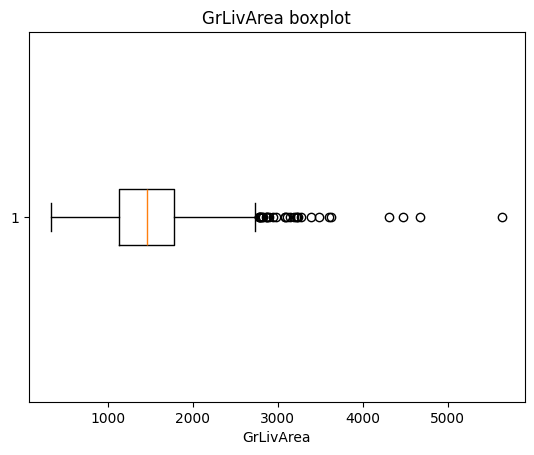

In [39]:
#A) Boxplot + IQR로 GrLivArea 이상치 후보 찾기
#1) boxplot으로 눈으로 확인
import matplotlib.pyplot as plt
plt.figure()
plt.boxplot(df["GrLivArea"].dropna(), vert=False)
plt.title("GrLivArea boxplot")
plt.xlabel("GrLivArea")
plt.show()

In [40]:
#2) IQR 기준 상한(upper bound) 계산
Q1 = df["GrLivArea"].quantile(0.25)
Q3 = df["GrLivArea"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR   # 면적은 보통 lower는 의미 적음
Q1, Q3, IQR, lower, upper

(np.float64(1130.75),
 np.float64(1779.0),
 np.float64(648.25),
 np.float64(158.375),
 np.float64(2751.375))

In [41]:
#3) IQR 기준으로 “면적 이상치 후보” 추출
area_outliers = df[df["GrLivArea"] > upper][["Id", "GrLivArea", "SalePrice"]].sort_values("GrLivArea", ascending=False)
area_outliers.head(10)

,Id,GrLivArea,SalePrice
1298,1299,5642.0,160000
523,524,4676.0,184750
1182,1183,4476.0,745000
691,692,4316.0,755000
1169,1170,3627.0,625000
185,186,3608.0,475000
304,305,3493.0,295000
635,636,3395.0,200000
769,770,3279.0,538000
1353,1354,3238.0,410000


In [42]:
# 4) 최종 삭제(dropout)는 “전/후 비교”로 확정
drop_ids = [1299, 524]  # 예시: 최종 후보로 확정된 경우
df_clean = df[~df["Id"].isin(drop_ids)].copy()
print("before:", df.shape, "after:", df_clean.shape)

before: (1460, 83) after: (1458, 83)


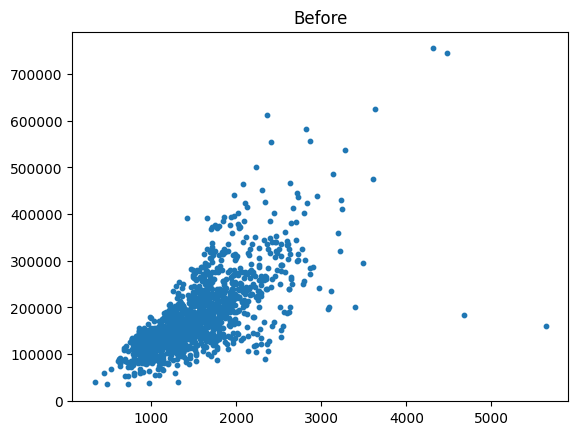

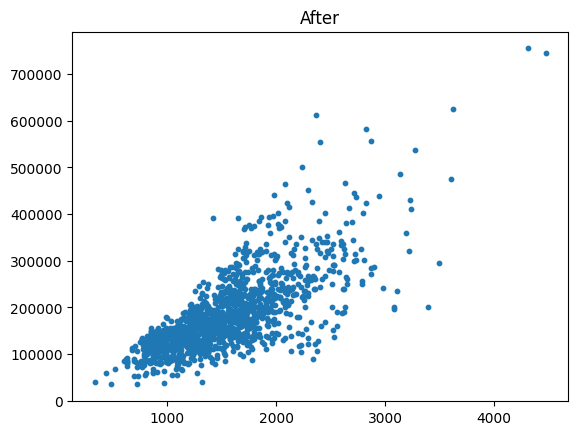

In [43]:
plt.figure()
plt.scatter(df["GrLivArea"], df["SalePrice"], s=10)
plt.title("Before")
plt.show()
plt.figure()
plt.scatter(df_clean["GrLivArea"], df_clean["SalePrice"], s=10)
plt.title("After")
plt.show()

In [44]:
num_cols = ["GrLivArea","TotalBsmtSF","GarageArea","OverallQual","YearBuilt"]
cat_cols = ["Neighborhood","HouseStyle","ExterQual"]
# 존재하는 컬럼만 사용(안전장치)
num_cols = [c for c in num_cols if c in df.columns]
cat_cols = [c for c in cat_cols if c in df.columns]
use_cols = ["Id", target, "SalePrice_log"] + num_cols + cat_cols
df_use = df[use_cols].copy()
df_use.head()

,Id,SalePrice,SalePrice_log,GrLivArea,TotalBsmtSF,GarageArea,OverallQual,YearBuilt,Neighborhood,HouseStyle,ExterQual
0,1,208500,12.247699,1710.0,856.0,548.0,7.0,2003.0,CollgCr,2Story,Gd
1,2,181500,12.109016,1262.0,1262.0,460.0,6.0,1976.0,Veenker,1Story,TA
2,3,223500,12.317171,1786.0,920.0,608.0,7.0,2001.0,CollgCr,2Story,Gd
3,4,140000,11.849405,1717.0,756.0,642.0,7.0,1915.0,Crawfor,2Story,TA
4,5,250000,12.429220,2198.0,1145.0,836.0,8.0,2000.0,NoRidge,2Story,Gd


In [45]:
#2-1) 숫자형 요약 확인
# df_use[num_cols + [target]].describe()
df_use[num_cols + [target]].describe()

,GrLivArea,TotalBsmtSF,GarageArea,OverallQual,YearBuilt,SalePrice
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1460.000000
mean,1515.362500,1054.588194,473.290278,6.104167,1971.287500,180921.195890
std,524.718211,438.547280,213.492613,1.383506,30.123893,79442.502883
min,334.000000,0.000000,0.000000,1.000000,1872.000000,34900.000000
25%,1130.750000,794.000000,336.000000,5.000000,1954.000000,129975.000000
50%,1464.000000,990.000000,480.000000,6.000000,1972.000000,163000.000000
75%,1779.000000,1291.500000,576.000000,7.000000,2000.000000,214000.000000
max,5642.000000,6110.000000,1418.000000,10.000000,2010.000000,755000.000000


In [46]:
df_use[num_cols].isna().sum().sort_values(ascending=False)

GrLivArea      20
TotalBsmtSF    20
GarageArea     20
OverallQual    20
YearBuilt      20
dtype: int64

In [47]:
for c in num_cols:
    df_use[c] = pd.to_numeric(df_use[c], errors="coerce")
    df_use[c] = df_use[c].fillna(df_use[c].median())

In [48]:
df_use[num_cols].isna().sum().sort_values(ascending=False)

GrLivArea      0
TotalBsmtSF    0
GarageArea     0
OverallQual    0
YearBuilt      0
dtype: int64

In [49]:
if "YrSold" in df.columns and "YearBuilt" in df_use.columns:
    df_use["HouseAge"] = df["YrSold"] - df_use["YearBuilt"]
    df_use["HouseAge"] = df_use["HouseAge"].clip(lower=0)  # 음수 방지(안전)
    num_cols = num_cols + ["HouseAge"]

In [50]:
df_use

,Id,SalePrice,SalePrice_log,GrLivArea,TotalBsmtSF,GarageArea,OverallQual,YearBuilt,Neighborhood,HouseStyle,ExterQual,HouseAge
0,1,208500,12.247699,1710.0,856.0,548.0,7.0,2003.0,CollgCr,2Story,Gd,5.0
1,2,181500,12.109016,1262.0,1262.0,460.0,6.0,1976.0,Veenker,1Story,TA,31.0
2,3,223500,12.317171,1786.0,920.0,608.0,7.0,2001.0,CollgCr,2Story,Gd,7.0
3,4,140000,11.849405,1717.0,756.0,642.0,7.0,1915.0,Crawfor,2Story,TA,91.0
4,5,250000,12.429220,2198.0,1145.0,836.0,8.0,2000.0,NoRidge,2Story,Gd,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,12.072547,1647.0,953.0,460.0,6.0,1999.0,Gilbert,2Story,TA,8.0
1456,1457,210000,12.254868,2073.0,1542.0,500.0,6.0,1978.0,NWAmes,1Story,TA,32.0
1457,1458,266500,12.493133,2340.0,1152.0,252.0,7.0,1941.0,Crawfor,2Story,Ex,69.0
1458,1459,142125,11.864469,1078.0,1078.0,240.0,5.0,1950.0,NAmes,1Story,TA,60.0


In [51]:
#4) 문자/범주 전처리: 결측의 의미 분기(누락 vs 없음)
#초보자에게 가장 중요한 규칙:
#품질(Qual) 계열 결측 → “모름/누락” 가능성 → 최빈값
#시설(Alley/PoolQC/Fence 등) 결측 → “없음(None)”일 수 있음 → "None"으로 별도 범주
df_use[cat_cols].isna().sum().sort_values(ascending=False)

Neighborhood    0
HouseStyle      0
ExterQual       0
dtype: int64

In [52]:
# 전체 범주형 최빈값으로 체우기
for c in cat_cols:
    df_use[c] = df_use[c].astype("object")
    if df_use[c].isna().any():
        df_use[c] = df_use[c].fillna(df_use[c].mode()[0])

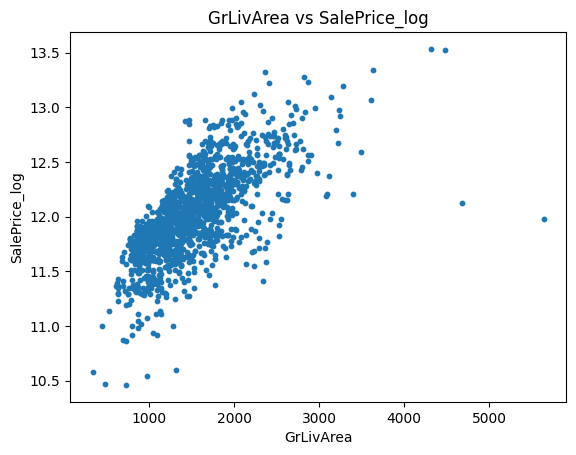

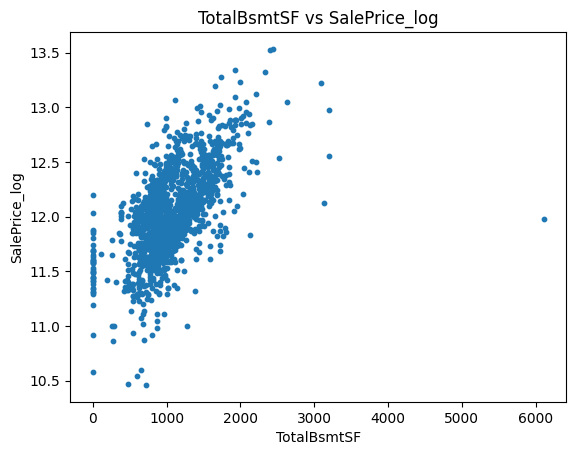

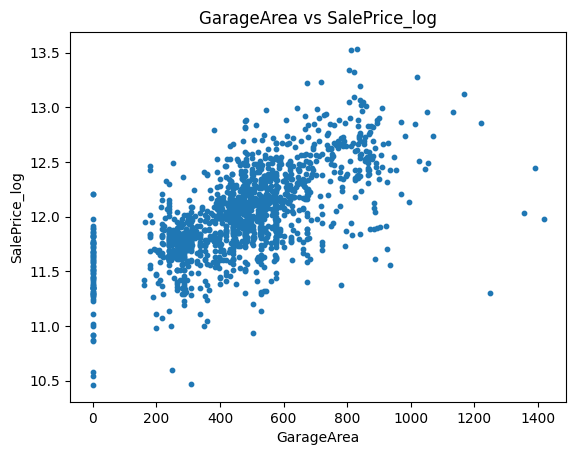

In [53]:
# 6) 시각화 2: 숫자형 vs 타깃(산점도) + “관계 깨는 점” 점검
for feat in ["GrLivArea","TotalBsmtSF","GarageArea"]:
    if feat in df_use.columns:
        plt.figure()
        plt.scatter(df_use[feat], df_use["SalePrice_log"], s=10)
        plt.title(f"{feat} vs SalePrice_log")
        plt.xlabel(feat); plt.ylabel("SalePrice_log")
        plt.show()

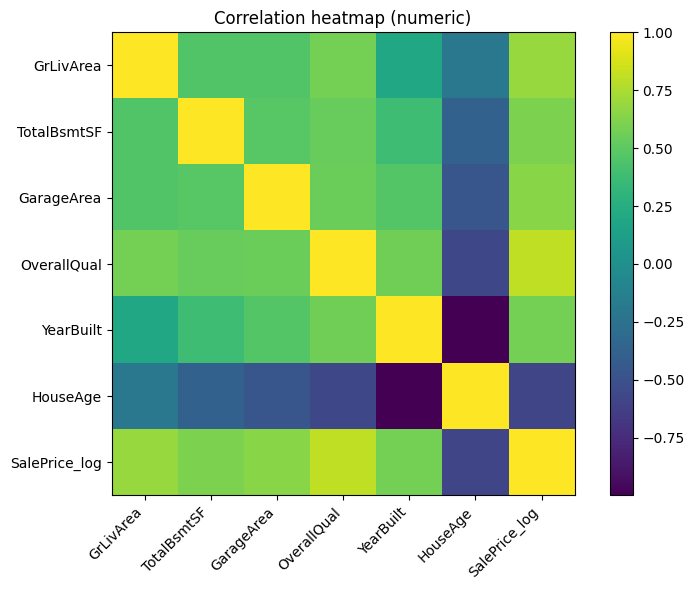

SalePrice_log    1.000000
OverallQual      0.811754
GrLivArea        0.694220
GarageArea       0.645578
TotalBsmtSF      0.606449
YearBuilt        0.582053
HouseAge        -0.582863
Name: SalePrice_log, dtype: float64

In [54]:
# 8) 히트맵: 숫자형 상관관계(타깃 포함) 보기
# 3 히트맵은 초보자에게 “무엇을 먼저 볼지” 정해주는 지도 역할을 합니다.
heat_cols = [c for c in num_cols if c in df_use.columns] + ["SalePrice_log"]
corr = df_use[heat_cols].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr.values)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation heatmap (numeric)")
plt.colorbar()
plt.tight_layout()
plt.show()
# 타깃과의 상관 높은 순 정렬 (의사결정용)
corr["SalePrice_log"].sort_values(ascending=False)